In [2]:
import np as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.6f}".format

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [35]:
train_df = pd.read_csv(filepath_or_buffer="Z_with_correlations/with_decay/no_j/no_j_10000.csv")
test_df = pd.read_csv(filepath_or_buffer="Z_with_correlations/with_decay/no_j/no_j_100.csv")
validation_df = pd.read_csv(filepath_or_buffer="Z_with_correlations/with_decay/no_j/no_j_1000.csv")

# train_df = pd.read_csv(filepath_or_buffer="Z_with_correlations/all_expectation_values_100000.csv")
# test_df = pd.read_csv(filepath_or_buffer="Z_with_correlations/all_expectation_values_100.csv")
# validation_df = pd.read_csv(filepath_or_buffer="Z_with_correlations/all_expectation_values_10000.csv")
train_df.head()

,0_0,0_1,0_2,1_0,1_1,1_2,decay_0,decay_1,W_0,W_1,J_0
0,0.716000,0.572000,0.432000,-0.160000,0.080000,0.032000,6.234196,3.471833,2.186976,5.963897,0.000000
1,0.604000,0.568000,0.372000,-0.020000,-0.064000,-0.044000,5.099405,5.015211,5.439470,4.933936,0.000000
2,0.628000,0.684000,0.448000,0.060000,0.076000,-0.008000,3.165579,3.734685,3.894384,3.797123,0.000000
3,0.560000,0.628000,0.404000,0.048000,0.032000,-0.024000,4.439700,4.883283,4.921239,3.929682,0.000000
4,0.632000,0.684000,0.476000,0.140000,-0.016000,-0.012000,3.710250,4.704687,3.971646,1.148018,0.000000


In [36]:
from tensorflow.python.keras.regularizers import L2, L1
import re
learning_rate = 0.0001
epochs = 300
batch_size = 100

# Get all column names as a list
keys = train_df.keys().tolist()
output_keys = ['W_0', 'W_1','decay_0', 'decay_1']
#output_keys = ['W_0', 'W_1', 'J_0']
# Remove specific columns from the list
keys = [key for key in keys if key not in output_keys]

inputs = {key:tf.keras.layers.Input(shape=(1,), name=key) for key in keys}
concatenated_inputs = tf.keras.layers.concatenate(inputs.values())
# Prepare data for training
train_features = {key: train_df[key] for key in inputs}
train_labels = train_df[output_keys]

# Similarly prepare test and validation data
test_features = {key: test_df[key] for key in inputs}
test_labels = test_df[output_keys]
#
validation_features = {key: validation_df[key] for key in inputs}
validation_labels = validation_df[output_keys]

#kernel_regularizer=L2(0.001)
hidden_layer_1 = tf.keras.layers.Dense(100, activation='relu')(concatenated_inputs)
hidden_layer_2 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer_3)

output = tf.keras.layers.Dense(len(output_keys))(hidden_layer_4) #TODO magic number

model = tf.keras.Model(inputs=inputs, outputs=output)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [37]:

# Train the model
history = model.fit(train_features, train_labels, validation_data=(validation_features, validation_labels), epochs=epochs, batch_size=batch_size);
#history = model.fit(train_features, train_labels, validation_split=0.2, epochs=epochs, batch_size=batch_size)

# Evaluate the model
model.evaluate(test_features, test_labels)

# Extract loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/300
100/100 [==============================] - 1s 3ms/step - loss: 28.0777 - val_loss: 26.3921
Epoch 2/300
100/100 [==============================] - 0s 2ms/step - loss: 22.6662 - val_loss: 16.1864
Epoch 3/300
100/100 [==============================] - 0s 2ms/step - loss: 8.8208 - val_loss: 5.3059
Epoch 4/300
100/100 [==============================] - 0s 2ms/step - loss: 4.9516 - val_loss: 5.0700
Epoch 5/300
100/100 [==============================] - 0s 2ms/step - loss: 4.7414 - val_loss: 4.8347
Epoch 6/300
100/100 [==============================] - 0s 2ms/step - loss: 4.5210 - val_loss: 4.5741
Epoch 7/300
100/100 [==============================] - 0s 2ms/step - loss: 4.2682 - val_loss: 4.2774
Epoch 8/300
100/100 [==============================] - 0s 2ms/step - loss: 3.9652 - val_loss: 3.9153
Epoch 9/300
100/100 [==============================] - 0s 2ms/step - loss: 3.5786 - val_loss: 3.4752
Epoch 10/300
100/100 [==============================] - 0s 2ms/step - loss: 3.1342 - va

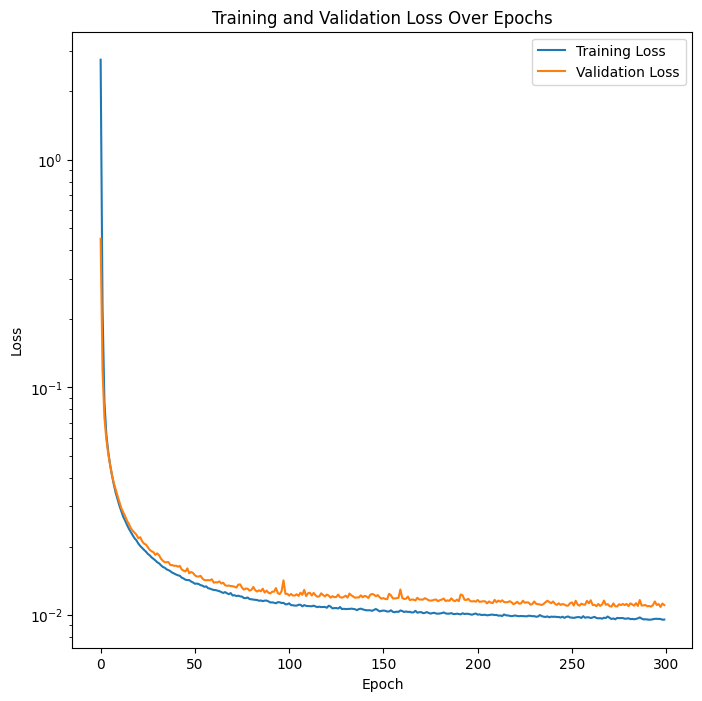

In [30]:
epochs_range = range(epochs)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
#plt.xlim([1,epochs])
#plt.ylim([0,2])
plt.semilogy()
plt.show()

In [22]:
import numpy as np

new_data = pd.read_csv("Z_values_100.csv")
first_line = new_data.iloc[1]
correct_output = first_line[['W_0', 'W_1', 'J_0']].array
#input_data = {key: [first_line[key]] for key in inputs}
input_data = {key: np.array([first_line[key]]) for key in inputs}
predictions = model.predict(input_data)
print("Predicted values for W_0, W_1, J_0:", predictions[0])
print("Correct values for W_0, W_1, J_0:", correct_output)
print("the mean squared error is: ", 0.3*np.linalg.norm(predictions[0]-correct_output)**2)


1/1 [==============================] - 0s 38ms/step
Predicted values for W_0, W_1, J_0: [2.8913333 1.5683926 3.477093 ]
Correct values for W_0, W_1, J_0: <PandasArray>
[3.006529156526901, 1.6888460445671911, 3.447146308063924]
Length: 3, dtype: float64
the mean squared error is:  0.008602770912034456
